<a href="https://colab.research.google.com/github/a01739368-glitch/tc1002s_semana_tec/blob/main/Actividad_de_Graficaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana Tec: El arte de la Analítica

# Demostración de análisis de datos con Pandas






#Carga de datos e impresión de contenido

In [33]:
#importamos Numpy y Pandas
import numpy as np
import pandas as pd

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el dataframe
df = pd.read_excel("/content/Sales Data Presentation - Dashboards.xlsx",
                    sheet_name="Raw Data")
print(df.head())

   OrderNum     EmpID     Employee Name      Employee Job Title  \
0   1102935  900019019  Alexandra Kundt  Senior Sales Associate   
1   1102976  900019019  Alexandra Kundt  Senior Sales Associate   
2   1102988  900019019  Alexandra Kundt  Senior Sales Associate   
3   1103012  900019019  Alexandra Kundt  Senior Sales Associate   
4   1103031  900019019  Alexandra Kundt  Senior Sales Associate   

     Sales Region  OrderDate  OrderType CustomerType  CustID  \
0  S Central East 2019-02-09     Retail   Individual  1574.0   
1  S Central East 2019-02-15     Retail   Individual  1809.0   
2  S Central East 2019-02-16     Retail   Individual  2253.0   
3  S Central East 2019-02-19  Wholesale     Business  4083.0   
4  S Central East 2019-02-22     Retail   Individual  2678.0   

             CustName    CustState ProdCategory ProdNumber  \
0      Skipton Fealty     Arkansas    Olive Oil      OO206   
1     Lanni D'Ambrogi     Missouri  Gift Basket      GB301   
2             Far Pow  Mis

In [35]:
#el método info permite identificar el tipo de dato de cada columna y, si es necesario,
#hacer las modificaciones pertinentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderNum            5130 non-null   int64         
 1   EmpID               5130 non-null   int64         
 2   Employee Name       5130 non-null   object        
 3   Employee Job Title  5130 non-null   object        
 4   Sales Region        5130 non-null   object        
 5   OrderDate           5130 non-null   datetime64[ns]
 6   OrderType           5130 non-null   object        
 7   CustomerType        5130 non-null   object        
 8   CustID              5124 non-null   float64       
 9   CustName            5130 non-null   object        
 10  CustState           5130 non-null   object        
 11  ProdCategory        5130 non-null   object        
 12  ProdNumber          5130 non-null   object        
 13  ProdName            5130 non-null   object      

In [36]:
#estadística de cada columna
df.describe()

,OrderNum,EmpID,OrderDate,CustID,Quantity,Price,Order Total
count,5.130000e+03,5.130000e+03,5130,5124.000000,5130.000000,5130.000000,5130.000000
mean,1.105436e+06,9.000149e+08,2020-02-03 09:49:28.421052672,2613.776347,3.220858,83.819146,333.080273
min,1.102871e+06,9.000104e+08,2019-02-01 00:00:00,1045.000000,1.000000,5.990000,5.990000
25%,1.104153e+06,9.000123e+08,2019-08-01 00:00:00,1866.000000,2.000000,14.500000,34.000000
50%,1.105436e+06,9.000150e+08,2020-02-06 00:00:00,2619.500000,3.000000,45.000000,104.000000
75%,1.106718e+06,9.000171e+08,2020-08-03 00:00:00,3360.250000,4.000000,123.000000,342.000000
max,1.108000e+06,9.000200e+08,2021-01-31 00:00:00,4126.000000,14.000000,234.000000,3276.000000
std,1.481048e+03,2.925929e+03,NaN,886.843520,2.513631,84.837607,592.435009


In [37]:
#podemos listar las columnas y los índices del dataframe, por ejemplo
print(df.columns)

Index(['OrderNum', 'EmpID ', 'Employee Name', 'Employee Job Title',
       'Sales Region', 'OrderDate', 'OrderType', 'CustomerType', 'CustID',
       'CustName', 'CustState', 'ProdCategory', 'ProdNumber', 'ProdName',
       'Quantity', 'Price', 'Order Total', 'Column1'],
      dtype='object')


In [38]:
print(df.index)

RangeIndex(start=0, stop=5130, step=1)


#Limpieza de datos

In [39]:
#método para detectar NaN en un dataframe
df.isnull().sum()

,0
OrderNum,0
EmpID,0
Employee Name,0
Employee Job Title,0
Sales Region,0
OrderDate,0
OrderType,0
CustomerType,0
CustID,6
CustName,0


#Agrupamiento y graficación

In [40]:
#los diez productos más vendidos mostrados en gráfica de barras
df_quantity = df.groupby('ProdName')['Quantity'].sum().sort_values(ascending=False).head(10)
print(df_quantity)

ProdName
Extra Virgin Olive Oil - Bold 12pk        711
Chili Extra Virgin Olive Oil 12pk         686
Basil Extra Virgin Olive Oil 12pk         675
Extra Virgin Olive Oil - Delicate 12pk    642
Rosemary Extra Virgin Olive Oil 12pk      634
Lemon Extra Virgin Olive Oil 12pk         621
Extra Virgin Olive Oil - Trio 12pk        620
Garlic Extra Virgin Olive Oil 12pk        617
Scented Olive Oil Lotion Gift Basket      258
Vanilla and Olive Bath Salts              239
Name: Quantity, dtype: int64


<Axes: xlabel='ProdName'>

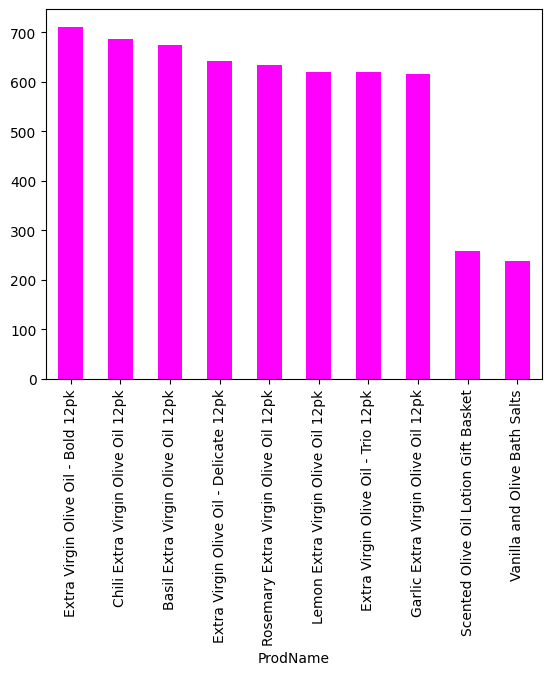

In [41]:
df_quantity.plot(kind='bar', color='magenta')

In [42]:
df_olive_oil = df[df['ProdName'] == 'Extra Virgin Olive Oil - Bold 12pk']['Quantity']
print(df_olive_oil)

18      11
27      11
135      4
199     13
201      2
        ..
4974     3
5033     2
5043    14
5067     9
5092     3
Name: Quantity, Length: 130, dtype: int64


<Axes: >

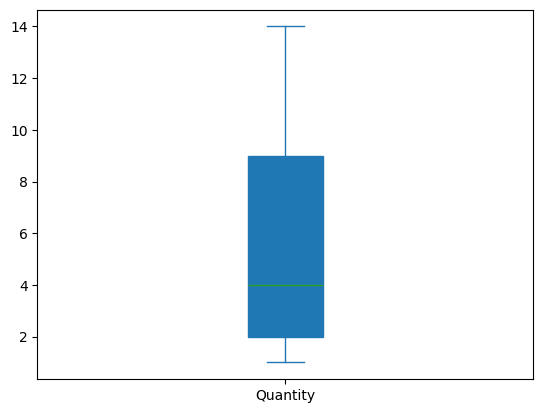

In [43]:
df_olive_oil.plot(kind='box',patch_artist=True)

ProdName
Lemon Extra Virgin Olive Oil 2pk         130
Extra Virgin Olive Oil - Delicate 6pk    145
Rosmary EVOO Gift Basket                 151
Basil EVOO Gift Basket                   151
Mandarin and Olive Oil Bar Soap 3pk      154
Name: Quantity, dtype: int64


<Axes: xlabel='ProdName'>

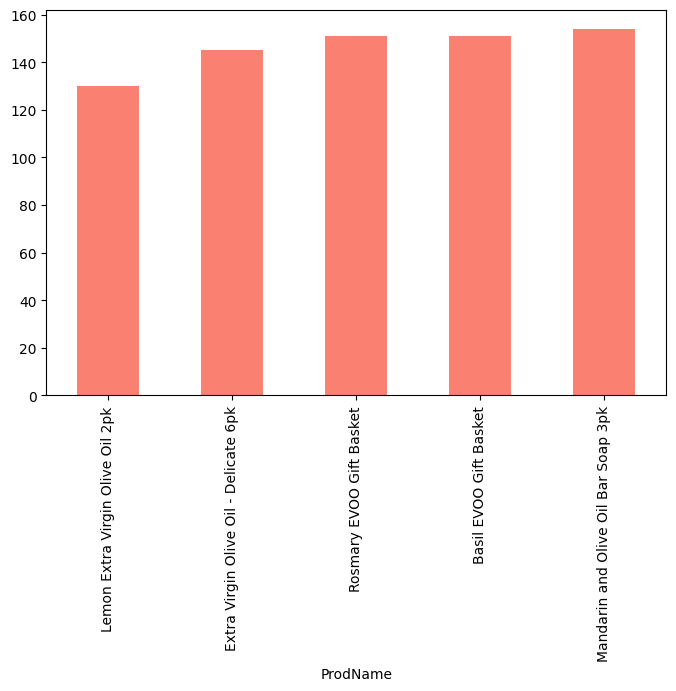

In [66]:
menos_vendidos = df.groupby('ProdName')['Quantity'].sum().sort_values().head(5)
print(menos_vendidos)

# Agrupar por producto y sumar la cantidad
# Agrupamos por nombre de producto y sumamos las cantidades
ventas_por_producto = df.groupby('ProdName')['Quantity'].sum().sort_values()

# Seleccionamos los 5 menos vendidos
menos_vendidos = ventas_por_producto.head(5)

plt.figure(figsize=(8,5))
menos_vendidos.plot(kind='bar', color='salmon')


{'whiskers': [<matplotlib.lines.Line2D at 0x7bbb3c16a7b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bbb3c16ad20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bbb3c16a4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bbb3c16b350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bbb3c16b620>],
 'means': []}

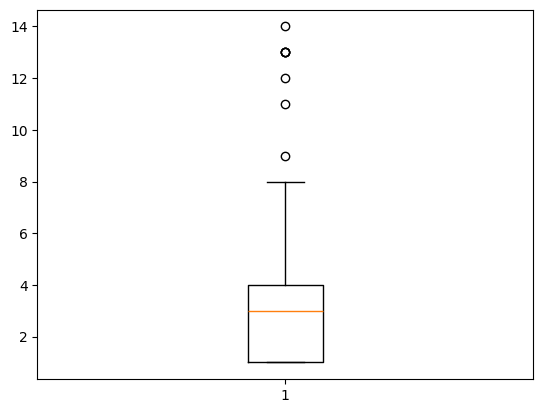

In [75]:
producto_especifico = "Scented Olive Oil Lotion Gift Basket"

df_producto = df[df['ProdName'] == producto_especifico]

plt.boxplot(df_producto['Quantity'])




{'whiskers': [<matplotlib.lines.Line2D at 0x7bbb3c040920>,
 'caps': [<matplotlib.lines.Line2D at 0x7bbb3c040e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bbb3c218da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bbb3c041490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bbb3c0417c0>],
 'means': []}

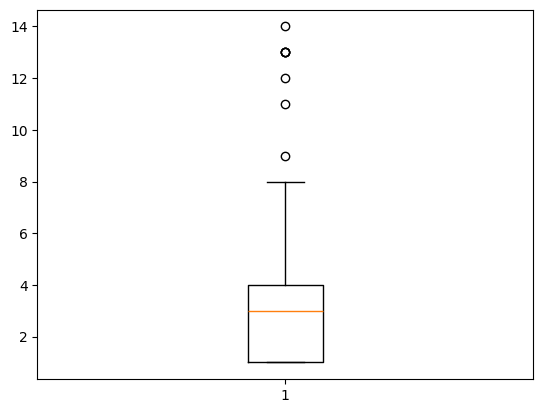

In [77]:
producto_especifico = "Scented Olive Oil Lotion Gift Basket"

df_producto = df[df['ProdName'] == producto_especifico]

plt.boxplot(df_producto['Quantity'])

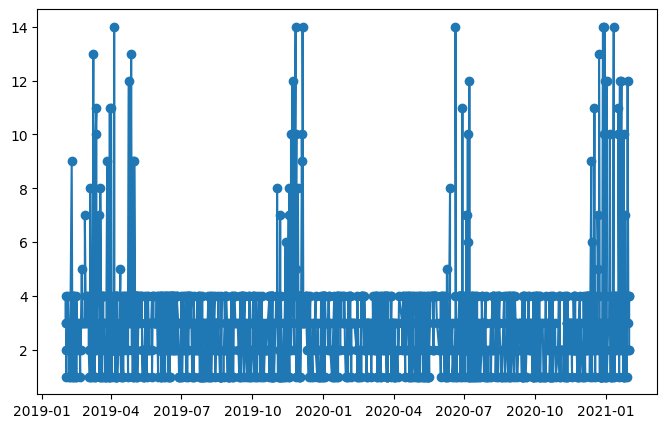

In [102]:
mask = df['ProdCategory'].str.strip().str.lower() == 'bath products'
df_bath = df[mask].copy()

    # Ordenar por fecha para que la línea tenga sentido
df_bath = df_bath.sort_values('OrderDate')

plt.figure(figsize=(8,5))
plt.plot(df_bath['OrderDate'], df_bath['Quantity'], marker='o', linestyle='-')


